In [1]:
#This notebook shows how to test for consistency between two (or more) datasets.
#Datasets are "consistent" if the observed counts for the same gatestrings across the datasets are all consistent
#with being generated by the same underlying gateset.

#This protocol can be used to test for, among other things, drift and crosstalk.  It can also be used
#to compare an experimental dataset to an "ideal" dataset.

In [2]:
#Import relevant namespaces
import pygsti
import numpy as np
from scipy import stats
from __future__ import division, print_function
from matplotlib import pyplot
%matplotlib inline
from pygsti.construction import std1Q_XYI
import scipy

In [3]:
#Let's first compare two datasets where the underlying gate sets are the same. 
#The datasets we'll use will be GST datasets (which allows us to do some nice visualization), but
#arbitrary datasets will work in general, provided that the gate sequences across the datasets are the same.

In [4]:
#Let's make our underlying gate set have a little bit of random unitary noise.
gs_exp_0 = std1Q_XYI.gs_target.copy()
gs_exp_0 = gs_exp_0.randomize_with_unitary(.01,seed=0)

In [5]:
germs = std1Q_XYI.germs
fiducials = std1Q_XYI.fiducials
max_lengths = [1,2,4,8,16,32,64,128,256]
gate_sequences = pygsti.construction.make_lsgst_experiment_list(std1Q_XYI.gates,fiducials,fiducials,germs,max_lengths)

In [6]:
#Generate the data for the two datasets, using the same gate set, with 100 repetitions of each sequence.
N=100
DS_0 = pygsti.construction.generate_fake_data(gs_exp_0,gate_sequences,N,'binomial',seed=10)
DS_1 = pygsti.construction.generate_fake_data(gs_exp_0,gate_sequences,N,'binomial',seed=20)

In [7]:
#Let's compare the two datasets.
comparator_0_1 = pygsti.report.datasetcomparison.make_data_comparator([DS_0,DS_1])

In [8]:
#Let's get the report from the comparator.
comparator_0_1.report(confidence_level=0.95)

Consistency report- datasets are inconsistent at given confidence level if EITHER of the following scores report inconsistency.

Threshold for individual gatestring scores is 18.3618237707
As measured by worst-performing gate strings, data sets are CONSISTENT at the 95.0% confidence level.
0 gate string(s) have loglikelihood scores greater than the threshold.

Threshold for sum of gatestring scores is 2859.82331502.
As measured by sum of gatestring scores, data sets are CONSISTENT at the 95.0% confidence level.
Total loglikelihood is 2339.25119876


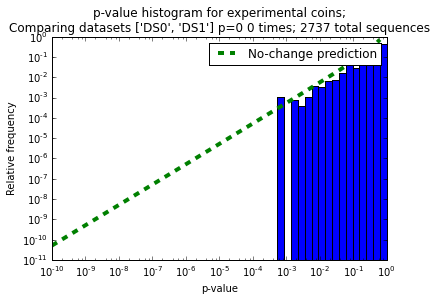

In [9]:
#As we expect, the datasets are consistent!
#We can also visualize this in a few ways:

#This is will show a histogram of the p-values associated with the different strings.
#If the null hypothesis (that the underlying gate sets are the same) is true,
#then we expect the distribution to roughly follow the dotted green line.
comparator_0_1.hist_p_plot()

/Users/kmrudin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


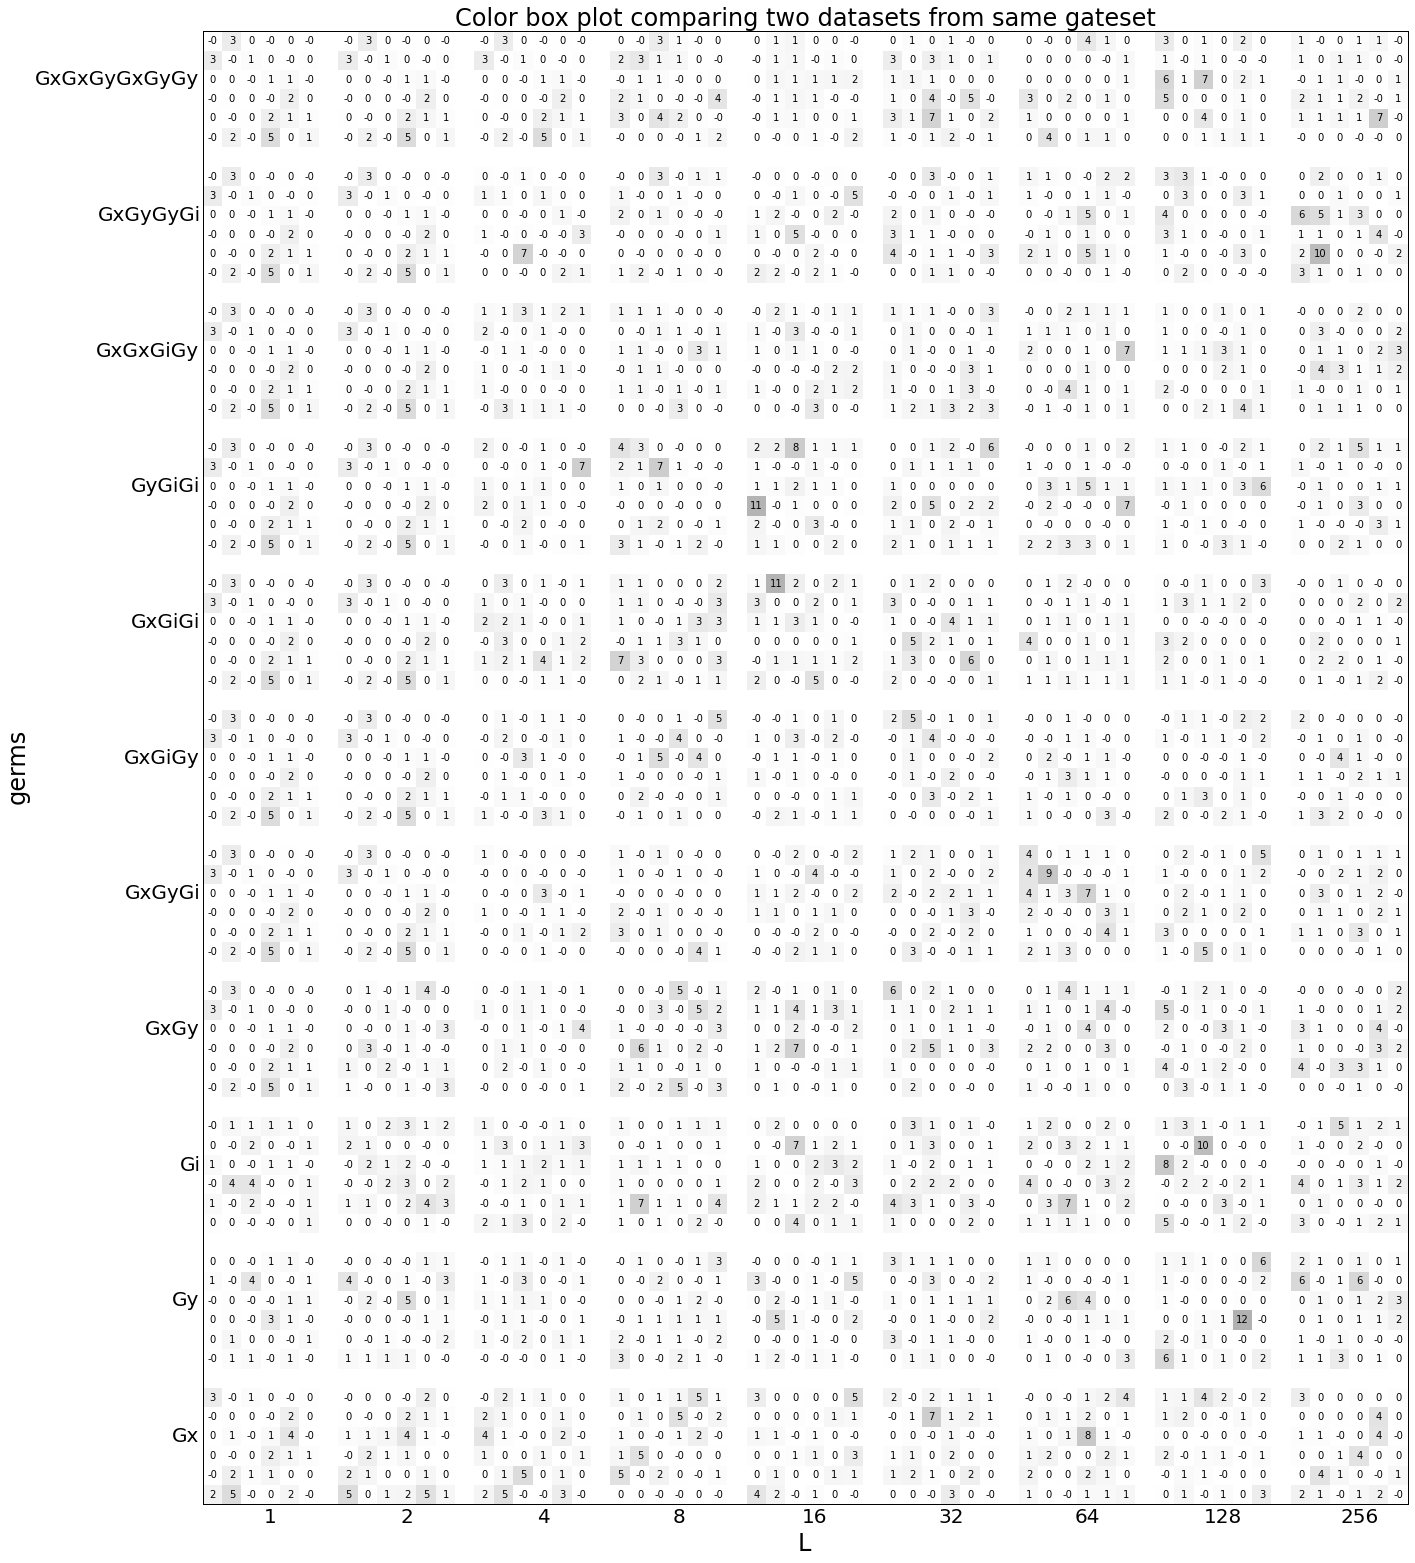

In [10]:
comparator_0_1.box_plot(germs,fiducials,fiducials,max_lengths,.05,0,'Color box plot comparing two datasets from same gateset')
#A lack of red boxes indicates consistency between datasets!

In [11]:
#Now let's generate data from two similar but not identical datasets and see if our tests can detect them.

In [12]:
gs_exp_1 = std1Q_XYI.gs_target.copy()
gs_exp_1 = gs_exp_1.randomize_with_unitary(.01,seed=1)

In [13]:
DS_2 = pygsti.construction.generate_fake_data(gs_exp_1,gate_sequences,N,'binomial',seed=30)

In [14]:
#Let's make the comparator and get the report.
comparator_1_2 = pygsti.report.datasetcomparison.make_data_comparator([DS_1,DS_2])
comparator_1_2.report(confidence_level=0.95)

Consistency report- datasets are inconsistent at given confidence level if EITHER of the following scores report inconsistency.

Threshold for individual gatestring scores is 18.3618237707
As measured by worst-performing gate strings, data sets are INCONSISTENT at the 95.0% confidence level.
642 gate string(s) have loglikelihood scores greater than the threshold.

Threshold for sum of gatestring scores is 2859.82331502.
As measured by sum of gatestring scores, data sets are INCONSISTENT at the 95.0% confidence level.
Total loglikelihood is 46987.6993727


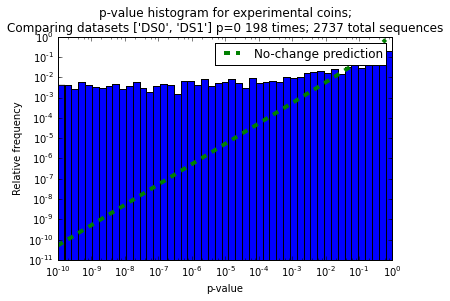

In [15]:
#The datasets are significantly inconsistent!  Let's see what the distribution of p-values looks like now:
comparator_1_2.hist_p_plot()

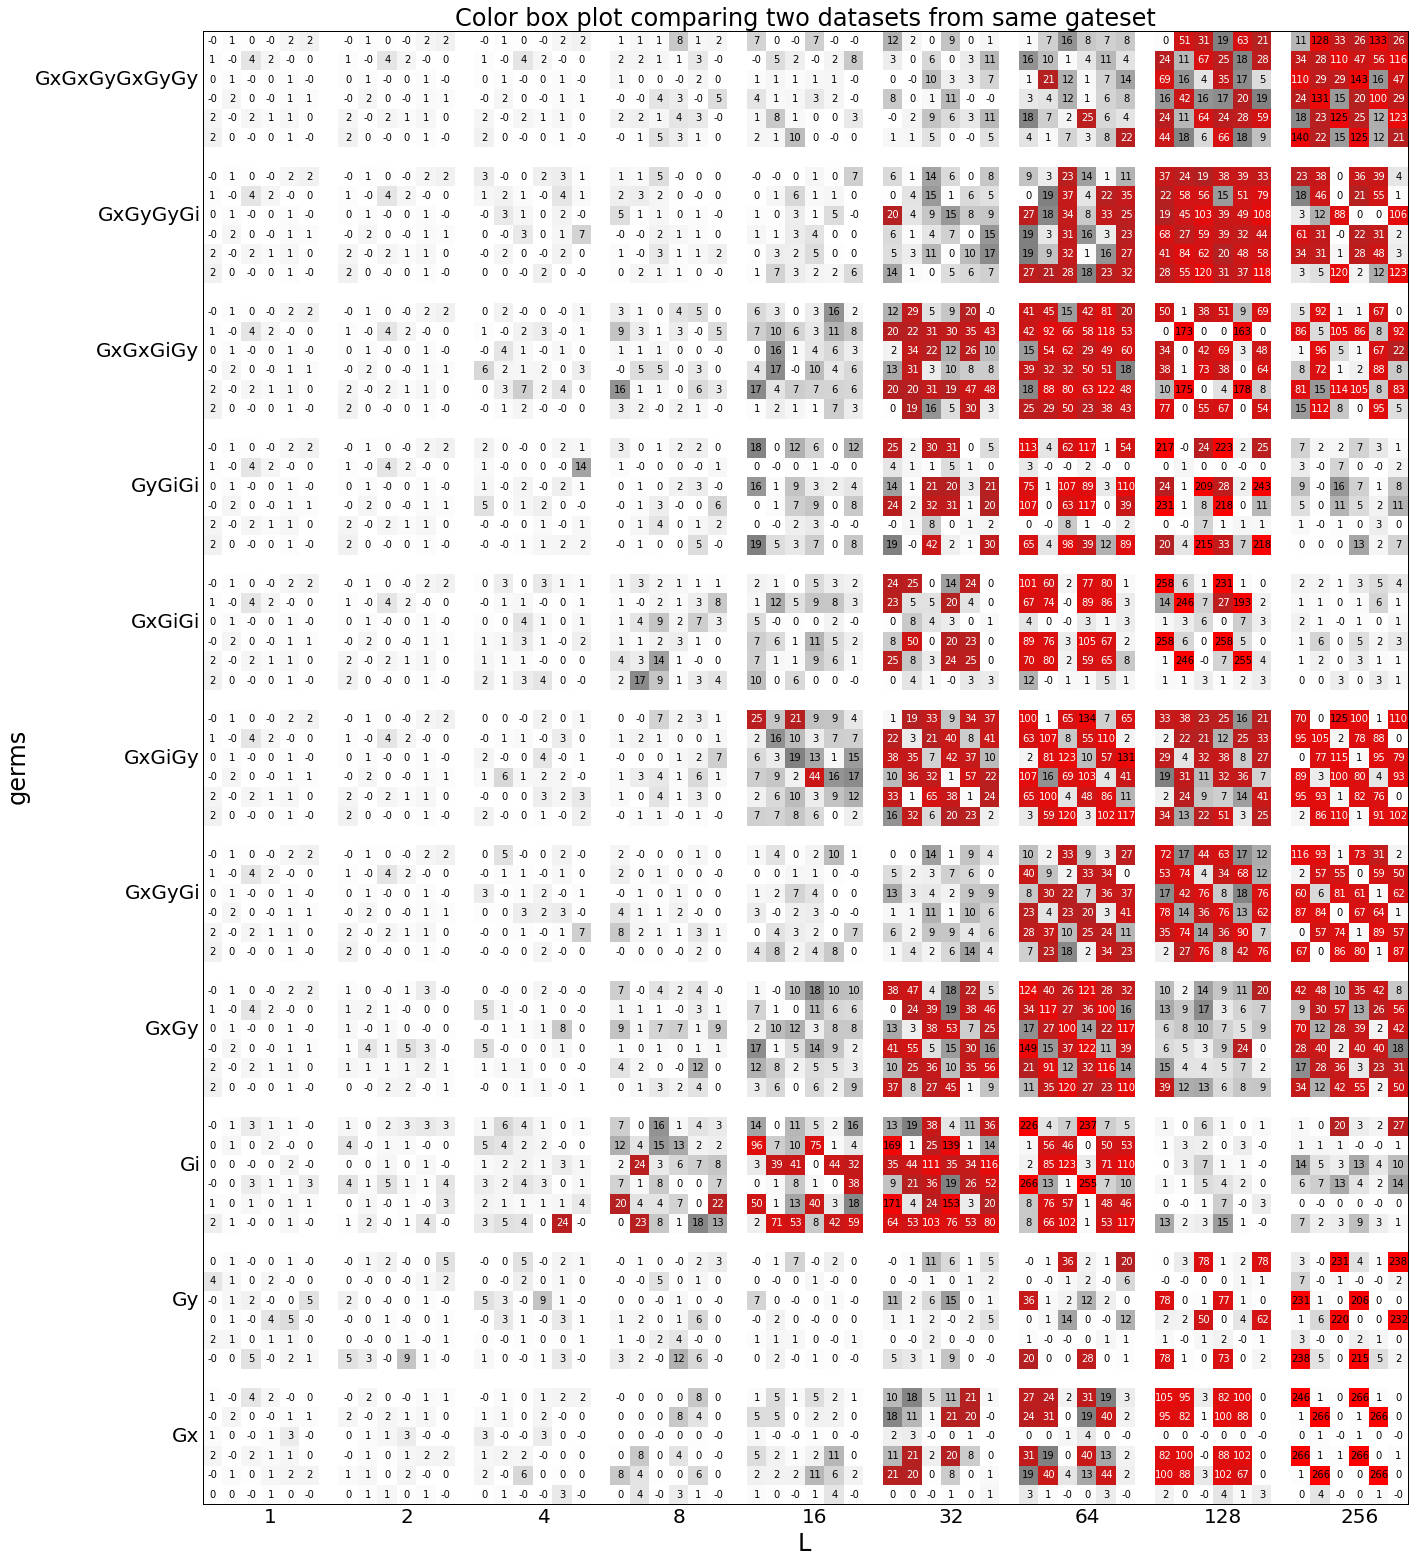

In [16]:
comparator_1_2.box_plot(germs,fiducials,fiducials,max_lengths,.05,0,'Color box plot comparing two datasets from same gateset')
#The red boxes indicate inconsistency between datasets!

In [ ]:
#While we only look at gate sets with Markovian, unitary errors here, this protocol can also be used when the 
#error is neither unitary nor Markovian.